In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Cleaning

In [5]:
# checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df['Car_Name'].nunique()

98

In [7]:
# since column car_name does provide any real value for our model it will be dropped
df = df.drop(columns=['Car_Name'], axis=1)

In [8]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Feature Augmentation

In [9]:
# adding a new column current year to identfy the age of each car.
df['Current_Year'] = 2023

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [11]:
# adding the column years used that will define the age of each car that will help us predict the peice more accurately.
df['Years_Used'] = df['Current_Year'] - df['Year']

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_Used
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [13]:
# since we dont need year and current year column as we already have column for age of car we can drop these two columns as we
df.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [15]:
# Convert the categorical data into bool(int) values 
df =pd.get_dummies(df, drop_first=True, dtype='int')

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


## Exploratory Data Analysis

In [17]:
# Define correlation between variables
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_Used,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


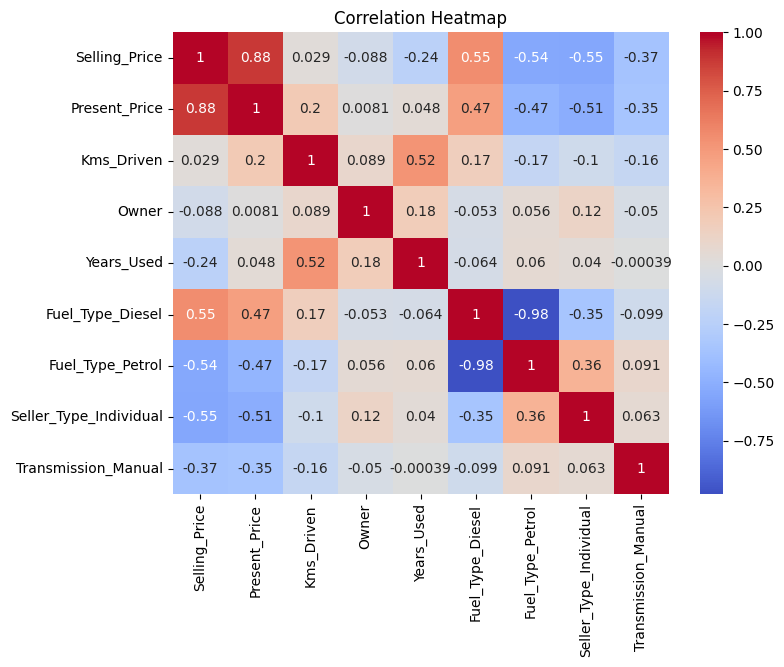

In [18]:
corr_mat = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

#### Theres a good correlation between price and below variables:
* present price
* fuel type
* seller type
* transmission

#### However, since we have only few features in datase, lets consider all of them.

## Data Preprocessing

In [19]:
# Separating training and test data
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# We will assign 80% data for training and rest for testing.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Standardizing the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training 

### Using RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Randomized Search CV for hyperparameter tuning

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
rf = RandomForestRegressor()

In [29]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)


In [30]:
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [31]:
# Got the best parameters
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 25}

In [32]:
rf_random.best_score_

-3.7215992317159396

In [33]:
# Prediction using training data 
yhat_train_rf = rf_random.predict(X_train)

# Prediction using test data
yhat_test_rf = rf_random.predict(X_test)

In [34]:
# Function to plot the performance 
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

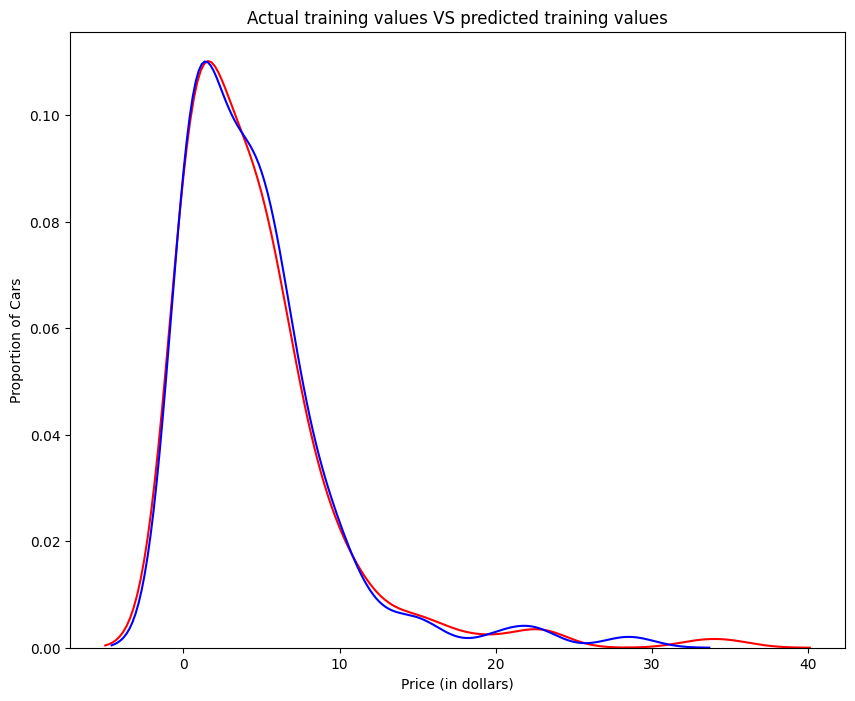

In [35]:
# Using training data to check for overfitting and underfitting
DistributionPlot(Y_train, yhat_train_rf, 'actual train values', 'predicted values for training data', 'Actual training values VS predicted training values')

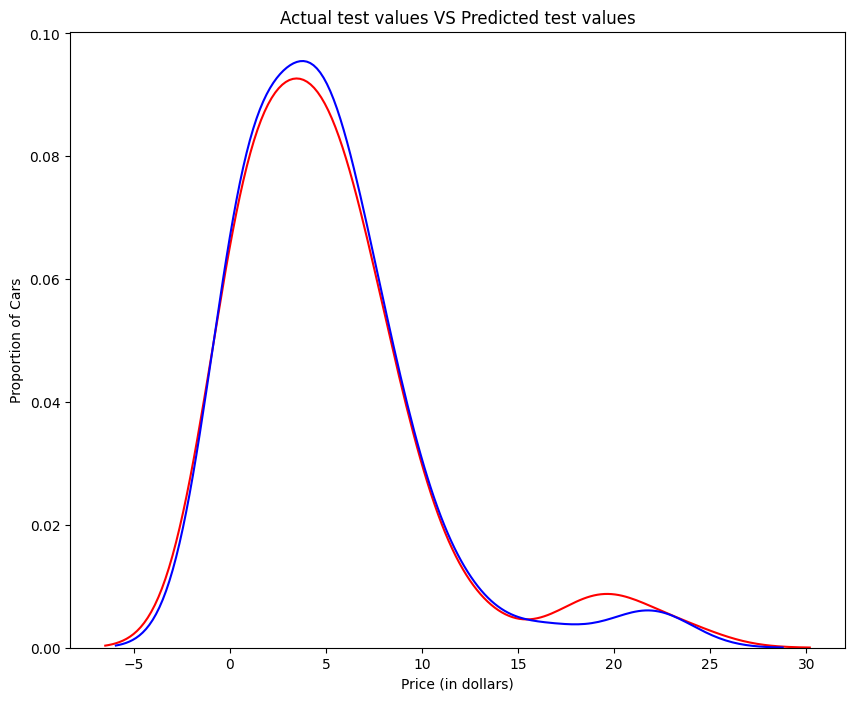

In [36]:
DistributionPlot(Y_test, yhat_test_rf,'Actual test values', 'Predicted values for test data', 'Actual test values VS Predicted test values')

#### From both the plots above we can see that the model is performing well on both the training data and test data.

In [37]:
# Using cross validation to check the performance 
from sklearn.model_selection import cross_val_score
validation_rf = cross_val_score(estimator=rf, X=X_train, y=Y_train, cv=10)
print('Accuracy score is {:.2f}%'.format(validation_rf.mean()*100))
print('Standard deviation is {:.2f}%'.format(validation_rf.std()*100))

Accuracy score is 91.65%
Standard deviation is 8.99%


### Using LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [39]:
lm.fit(X_train, Y_train)

LinearRegression()

In [40]:
# Prediction using training data
yhat_train_lm= lm.predict(X_train)

# Prediction using test data
yhat_test_lm = lm.predict(X_test)

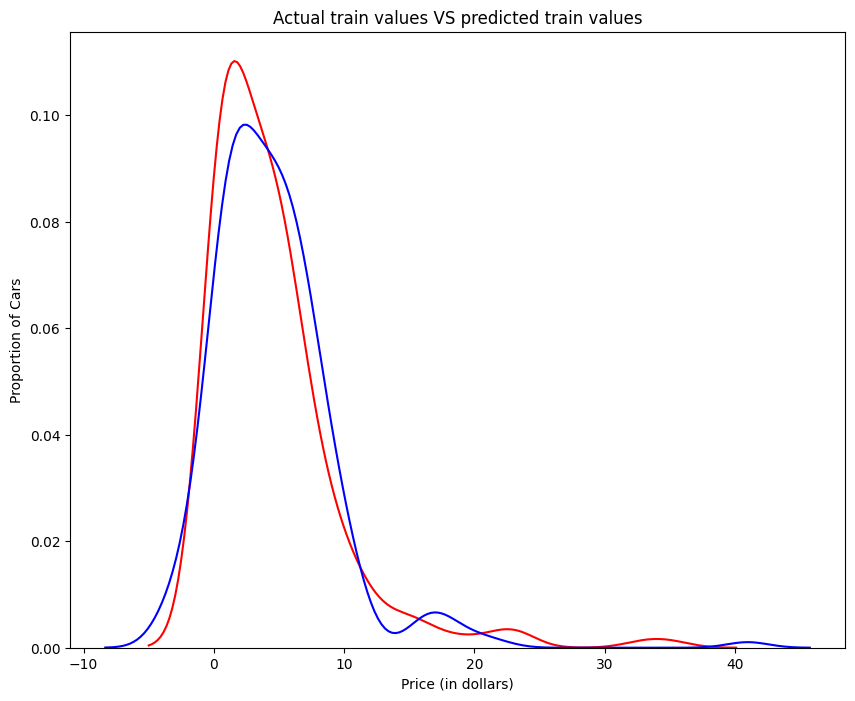

In [41]:
# Plotting both training and test prediction 
DistributionPlot(Y_train, yhat_train_lm, 'Actaul train values', 'predicted train values', 'Actual train values VS predicted train values')

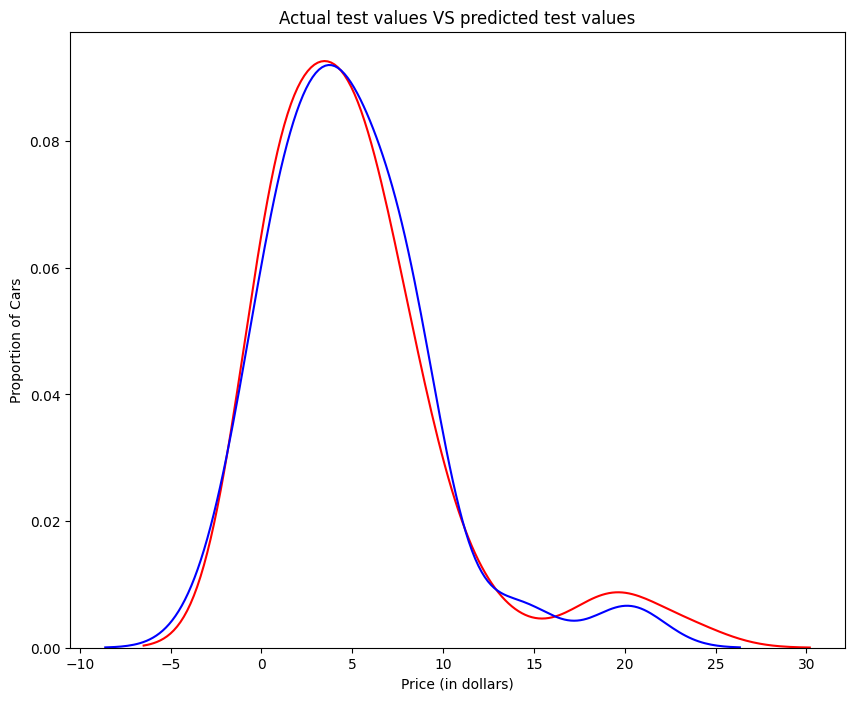

In [42]:
DistributionPlot(Y_test, yhat_test_lm, 'Actaul test values', 'predicted test values', 'Actual test values VS predicted test values')

#### Both plots seems to be fine. Predicted values are closer to the actual values in training and test data.

In [43]:
# Cross validation
validation_lm = cross_val_score(estimator=lm, X=X_train, y=Y_train, cv=10)
print('Accuracy score is {:.2f}%'.format(validation_lm.mean()*100))
print('Standard deviation is {:.2f}%'.format(validation_lm.std()*100))

Accuracy score is 75.58%
Standard deviation is 23.34%


## Model Selection

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Testing the performance of RandomForestRegressor
r2 = r2_score(Y_test ,yhat_test_rf)
print('R-squred of RandomForestRegressor:',r2)
print('MAE of RandomForestRegressor:', metrics.mean_absolute_error(Y_test, yhat_test_rf))
print('MSE of RandomForestRegressor:', metrics.mean_squared_error(Y_test, yhat_test_rf))
print('RMSE of RandomForestRegressor:', np.sqrt(metrics.mean_squared_error(Y_test, yhat_test_rf)))

R-squred of RandomForestRegressor: 0.9457916629476295
MAE of RandomForestRegressor: 0.5837401639344237
MSE of RandomForestRegressor: 1.370241404837709
RMSE of RandomForestRegressor: 1.1705731095654424


In [45]:
# Testing the performance of LinearRegression
r2 = r2_score(Y_test ,yhat_test_lm)
print('R-squred of LinearRegression:',r2)
print('MAE of LinearRegression:', metrics.mean_absolute_error(Y_test, yhat_test_lm))
print('MSE of LinearRegression:', metrics.mean_squared_error(Y_test, yhat_test_lm))
print('RMSE of LinearRegression:', np.sqrt(metrics.mean_squared_error(Y_test, yhat_test_lm)))

R-squred of LinearRegression: 0.9144342972228512
MAE of LinearRegression: 0.9937753386730486
MSE of LinearRegression: 2.1628715277876083
RMSE of LinearRegression: 1.4706704347975479


#### Given the performance score of both models, **RandomForestRegressor** seems a good fit for this dataset.

## Testing Model

In [153]:
random_rows = df.sample(15)
random_rows

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
45,7.50,12.04,15000,0,9,0,1,0,0
141,0.60,0.80,20000,0,7,0,1,1,1
279,6.25,13.60,40126,0,9,0,1,0,1
267,8.35,9.40,19434,0,7,1,0,0,1
181,0.30,0.48,50000,0,7,0,1,1,1
268,4.80,5.80,19000,0,6,0,1,0,1
31,2.35,4.89,54200,0,12,0,1,0,1
47,1.05,4.15,65000,0,17,0,1,0,1
178,0.35,0.52,19000,0,9,0,1,1,0
213,2.90,6.79,31604,0,12,0,1,0,1


In [154]:
new_data = random_rows.iloc[:,1:]

In [155]:
new_data_pred = np.round(rf_random.predict(sc.transform(new_data)),2)
new_df = pd.DataFrame(new_data_pred, columns= ['Prediction'])
new_df['Actual values'] = random_rows['Selling_Price'].reset_index(drop=True)
new_df

,Prediction,Actual values
0,7.24,7.50
1,0.62,0.60
2,6.42,6.25
3,8.36,8.35
4,0.34,0.30
5,5.00,4.80
6,2.53,2.35
7,1.49,1.05
8,0.42,0.35
9,3.03,2.90


In [156]:
# new data evaluation

new_target = random_rows.iloc[:,0]
r2 = r2_score(new_target ,new_data_pred)
print('R-squred of new data:',r2)
print('MAE of new data:', metrics.mean_absolute_error(new_target ,new_data_pred))
print('MSE of new data:', metrics.mean_squared_error(new_target ,new_data_pred))
print('RMSE of new data:', np.sqrt(metrics.mean_squared_error(new_target ,new_data_pred)))

R-squred of new data: 0.9978024629933454
MAE of new data: 0.1146666666666666
MSE of new data: 0.02675999999999998
RMSE of new data: 0.1635848403734282


#### Model is performing well on new data as predicted values are very close to the actual values.